<font color=green> Customer Retention </font>

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
%matplotlib inline

<font color=purple> Datset Info </font>

In [2]:
data=pd.read_excel("customer_retention_dataset.xlsx")

In [3]:
data.head(3)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       

  Longer time in displaying graphics and photos (promotion, sales period)  \
0                                          Amazon.in                        
1                                         Myntra.com                        
2                                         Myntra.com                        

  Late declaration of price (promotion, sales period)  \
0                                       Flipkart.com    
1                                       snapdeal.com    
2                                         Myntra.com    

  Longer page loading time (promotion, sales period)  \
0                                       Flipkart.com   
1                                       Snapdeal.com   
2                                         Myntra.com   

  Limited mode of payment on most products (promotion, sales period)  \
0                                          Amazon.in                   
1                                       Snapdeal.com                   
2                                          Amazon.in                   

  Longer delivery period Change in website/Application design  \
0              Paytm.com                         Flipkart.com   
1           Snapdeal.com                            Amazon.in   
2              Paytm.com                 

In [4]:
data.columns.tolist()

['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '4 What is the Pin Code of where you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [6]:
data.shape

(269, 71)

<font color=blue> Our dataset has 269 records with 71 variables. We will consider "Gender of the repondent" as our target variable.
Out of the 70 independent columns, only 1 column is int data type and other 69 columns are object data type. </font>

<font color=purple> Target Analysis </font>

In [7]:
data["1Gender of respondent"].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [8]:
data["1Gender of respondent"]=data["1Gender of respondent"].map({"Female": 1, "Male":0})

In [9]:
data["1Gender of respondent"].value_counts()

1    181
0     88
Name: 1Gender of respondent, dtype: int64

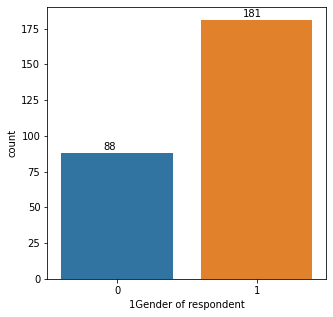

In [10]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5,5))
ax=sns.countplot(x="1Gender of respondent", data=data)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+.3, p.get_height()+2))

In [11]:
print("{}% of the data is having class 1 or will be retained".format(len(data[data["1Gender of respondent"]==1])/len (data)))
print("{}% of the data is having class 1 or will be retained".format(len(data[data["1Gender of respondent"]==0])/len (data)))

0.6728624535315985% of the data is having class 1 or will be retained
0.3271375464684015% of the data is having class 1 or will be retained


<font color= blue> As we can see according to the percentage of data in target variable, the data is balanced no need of undersampling or oversampling.<font>

<font color=purple> Missing Value Check </font>

In [12]:
data_missing=data.isnull().sum()

<font color= blue> No null values present in the dataset.<font>

<font color=purple> Normality Check </font>

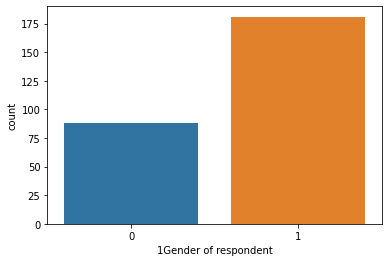

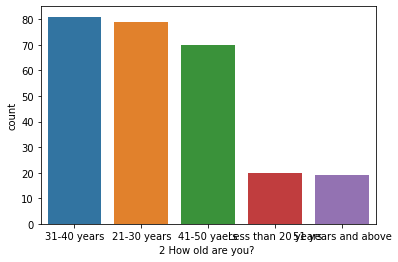

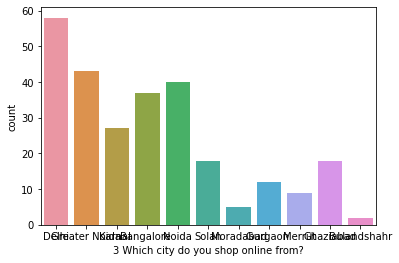

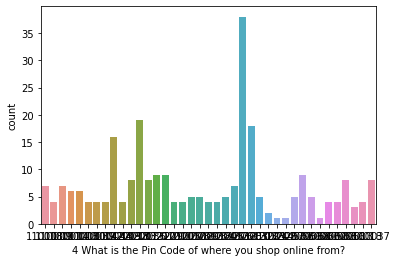

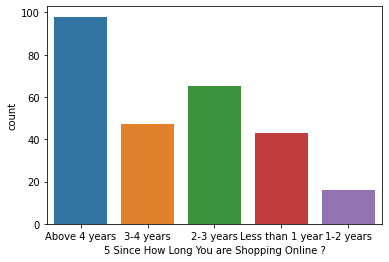

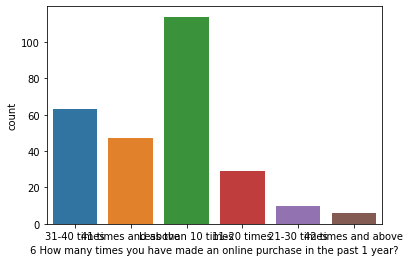

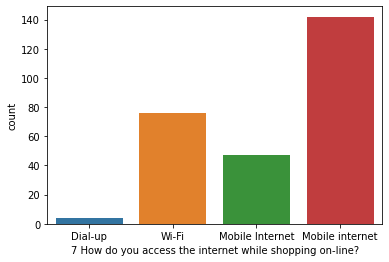

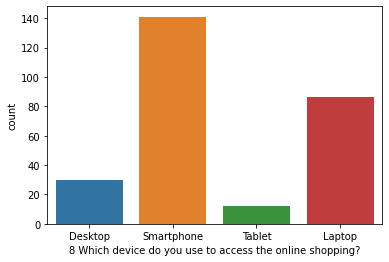

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


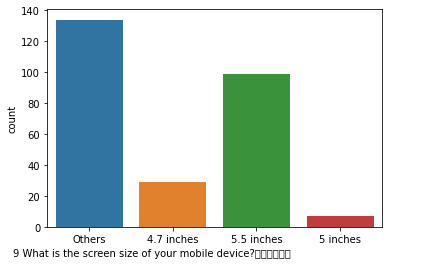

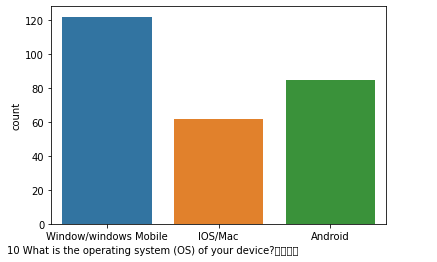

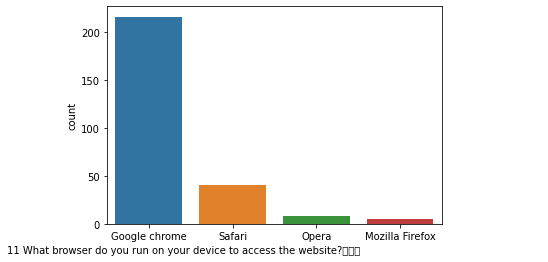

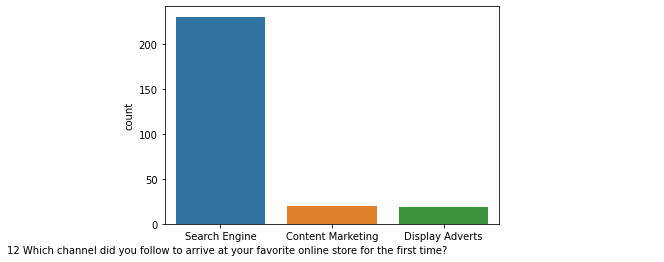

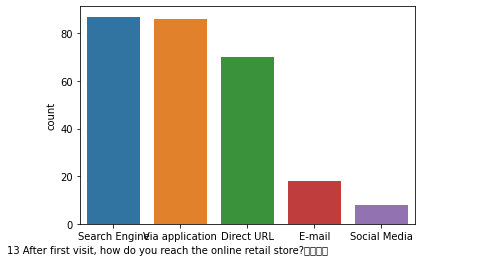

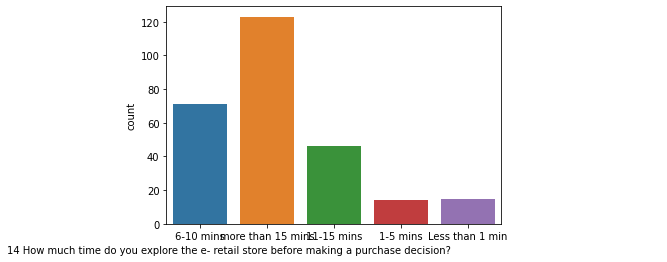

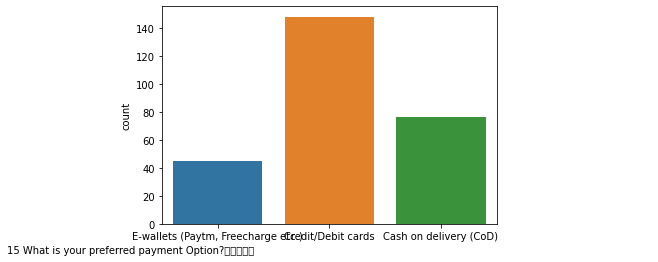

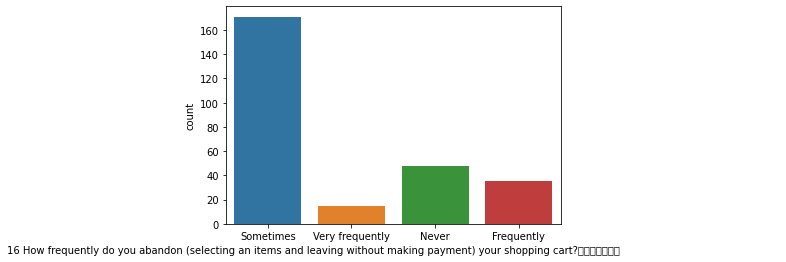

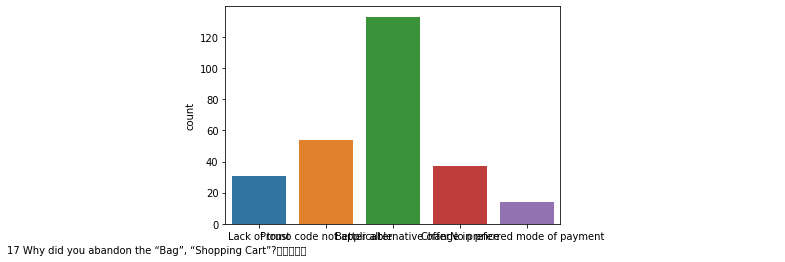

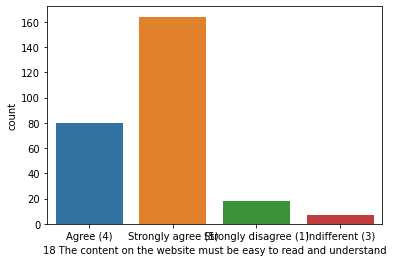

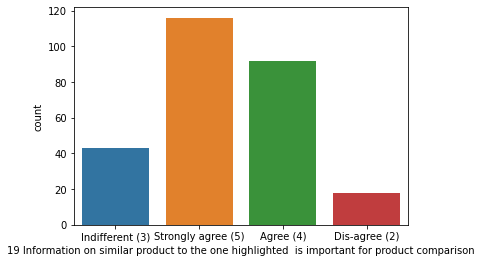

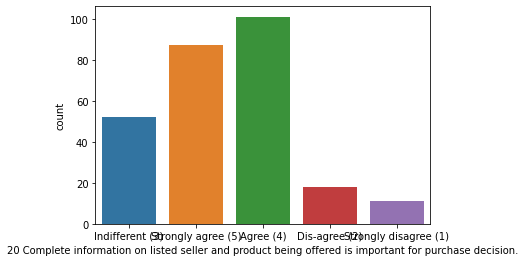

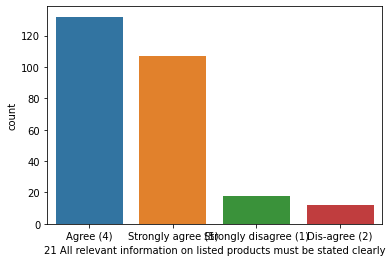

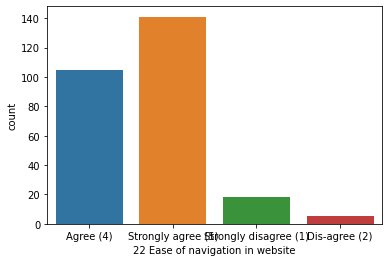

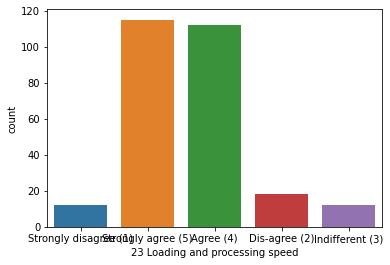

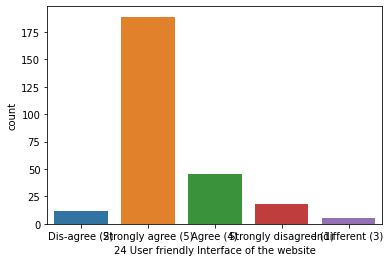

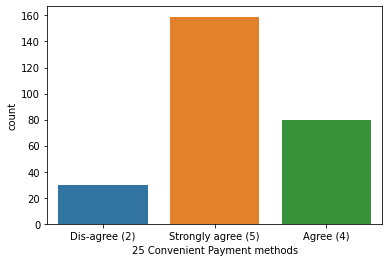

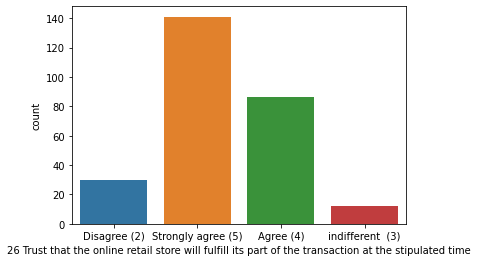

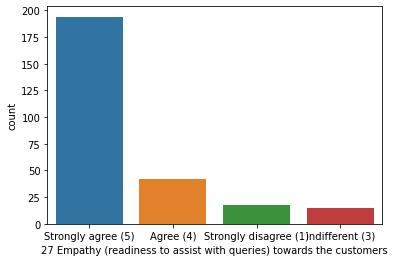

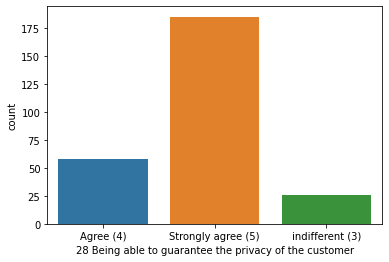

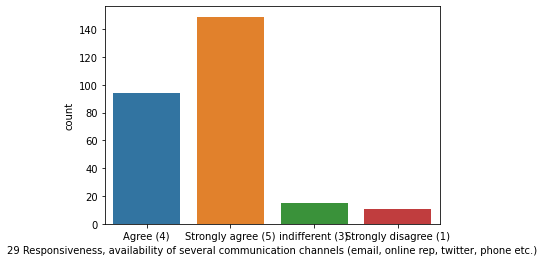

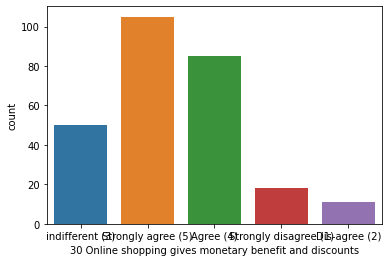

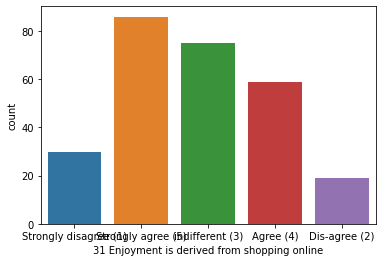

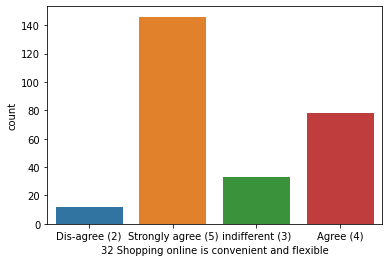

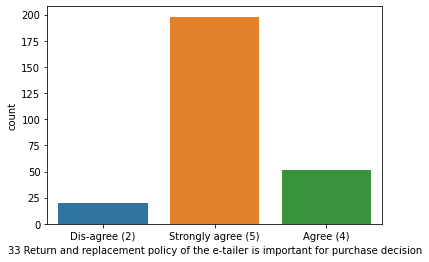

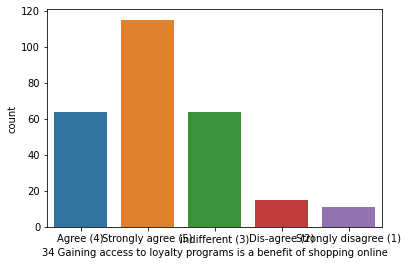

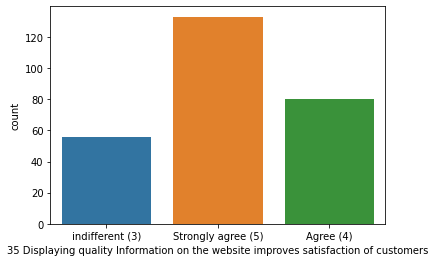

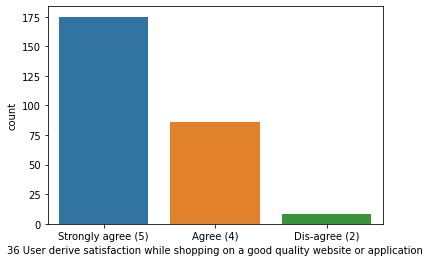

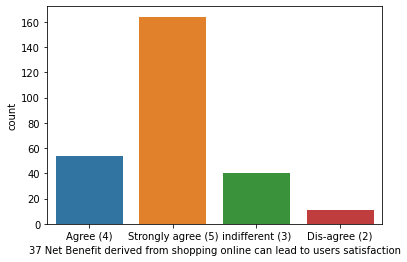

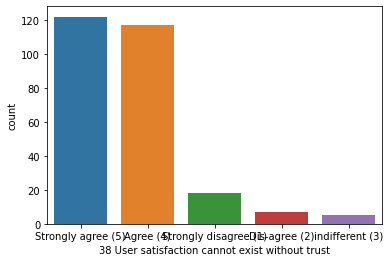

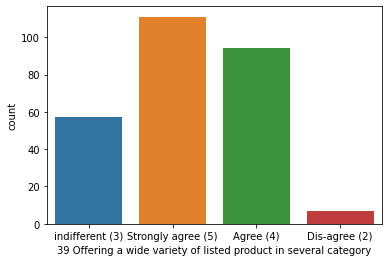

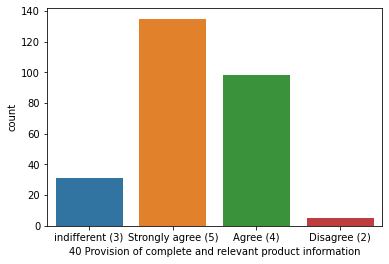

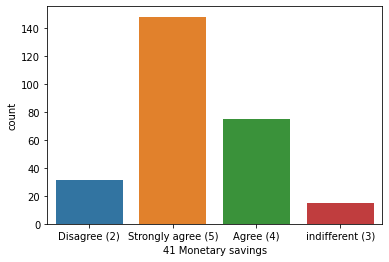

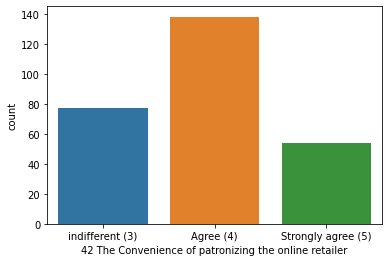

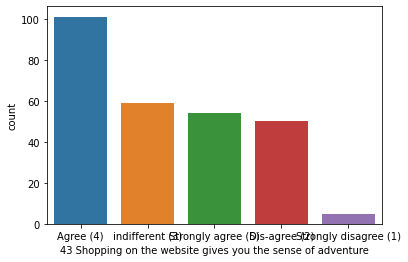

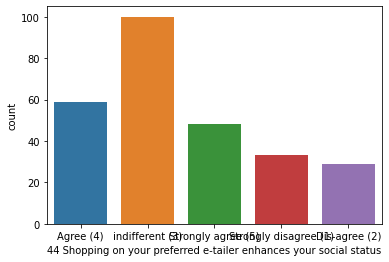

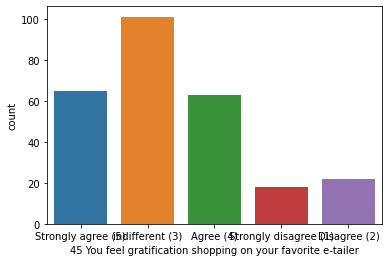

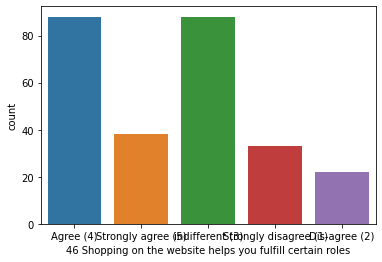

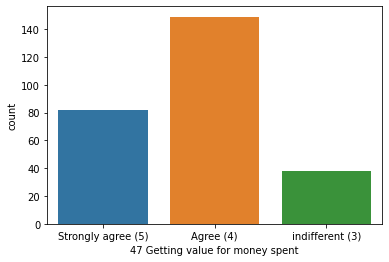

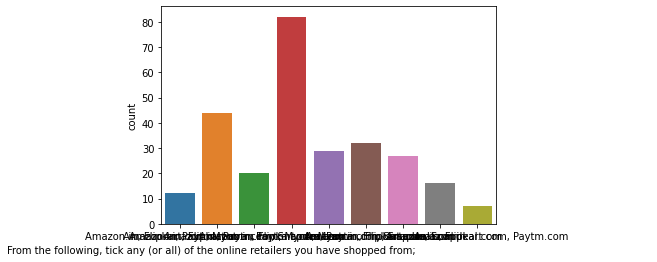

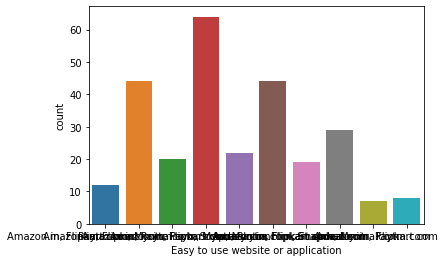

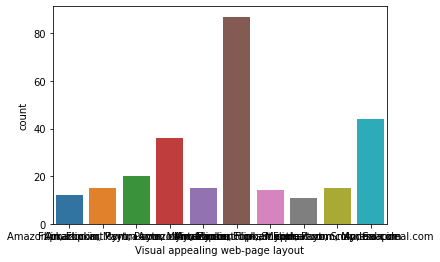

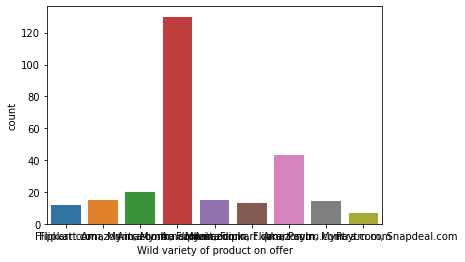

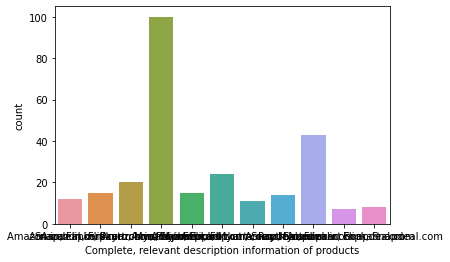

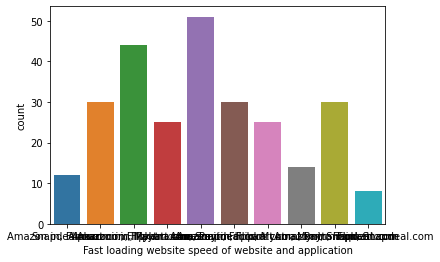

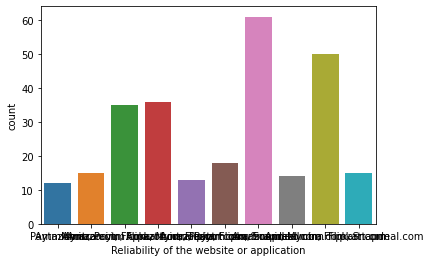

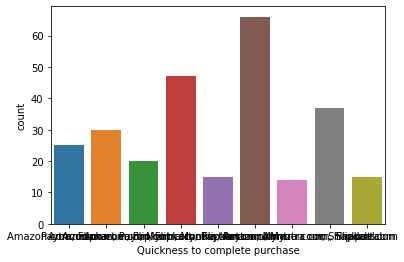

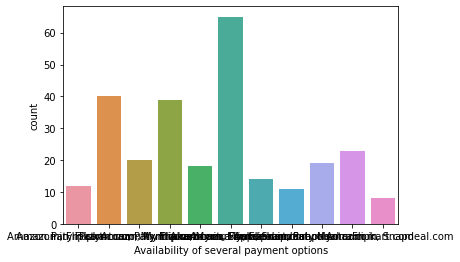

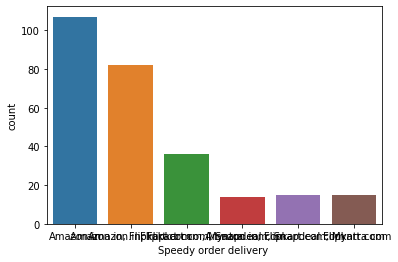

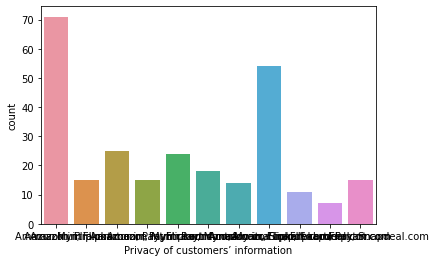

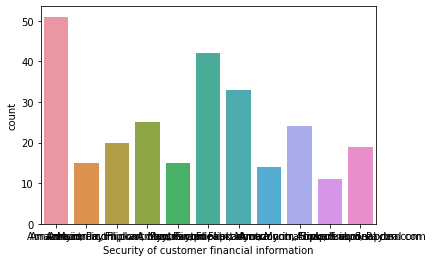

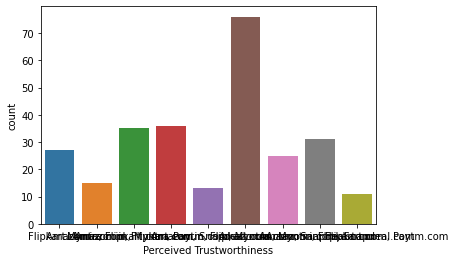

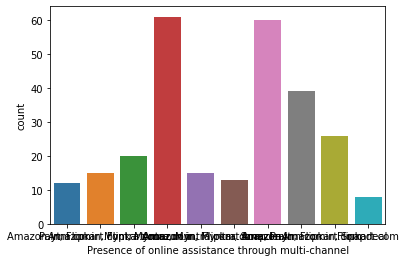

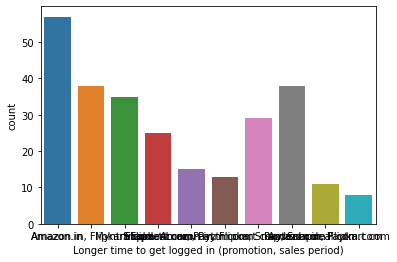

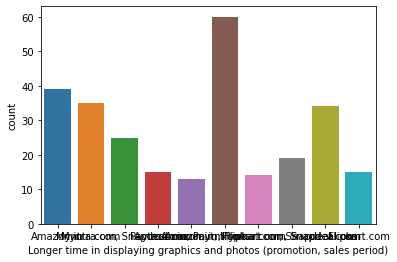

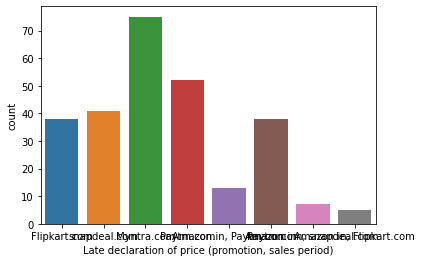

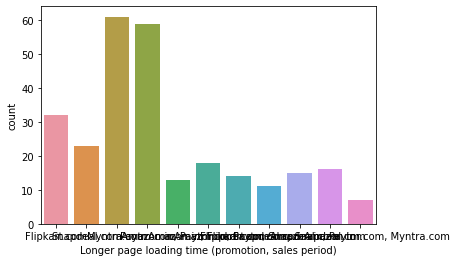

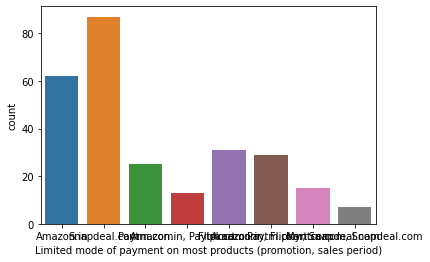

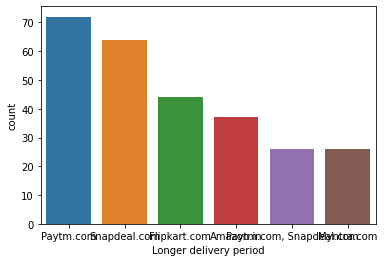

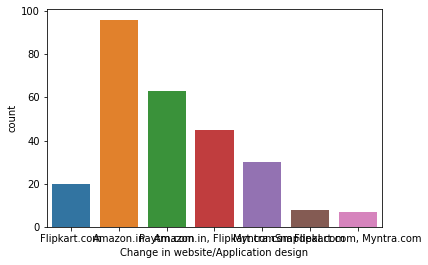

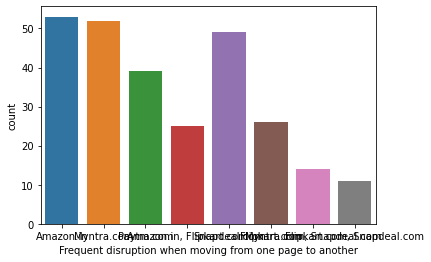

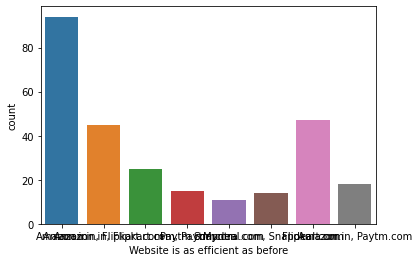

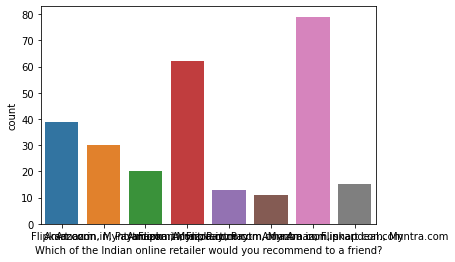

In [13]:
for each in data.columns:
    sns.countplot(each, data=data)
    plt.show()

<font color=purple> Encoding </font>

In [14]:
features_mod=['2 How old are you? ', '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',]

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for each in features_mod:
    data[each]=le.fit_transform(data[each])

In [16]:
data.head(3)

1Gender of respondent  2 How old are you?   \
0                      0                    1   
1                      1                    0   
2                      1                    0   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       

   5 Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  2                       
1                                                  3                       
2                                                  3                       

   7 How do you access the internet while shopping on-line?  \
0                                                  0          
1                                                  3          
2                                                  1          

   8 Which device do you use to access the online shopping?  \
0                                                  0          
1                                                  2          
2                                                  2          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  3                                                      
1                                                  0                                                      
2                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  2                                                        
1                                                  1                                                        
2                                                  0                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        

   Longer time in displaying graphics and photos (promotion, sales period)  \
0                                          Amazon.in                         
1                                         Myntra.com                         
2                                         Myntra.com                         

   Late declaration of price (promotion, sales period)  \
0                                       Flipkart.com     
1                                       snapdeal.com     
2                                         Myntra.com     

   Longer page loading time (promotion, sales period)  \
0                                       Flipkart.com    
1                                       Snapdeal.com    
2                                         Myntra.com    

   Limited mode of payment on most products (promotion, sales period)  \
0                                          Amazon.in                    
1                                       Snapdeal.com                    
2                                          Amazon.in                    

   Longer delivery period  Change in website/Application design  \
0               Paytm.com                          Flipkart.com   
1            Snapdeal.com                      

In [17]:
features2=['18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent']

In [18]:
for each in features2:
    data[each]=data[each].map({"Strongly agree (5)":5, "Agree (4)":4, "indifferent (3)":3, "Dis-agree (2)": 2, 
                               "Strongly disagree (1)": 1})

In [19]:
features3=['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
 'Easy to use website or application',
 'Visual appealing web-page layout',
 'Wild variety of product on offer',
 'Complete, relevant description information of products',
 'Fast loading website speed of website and application',
 'Reliability of the website or application',
 'Quickness to complete purchase',
 'Availability of several payment options',
 'Speedy order delivery ',
 'Privacy of customers’ information',
 'Security of customer financial information',
 'Perceived Trustworthiness',
 'Presence of online assistance through multi-channel',
 'Longer time to get logged in (promotion, sales period)',
 'Longer time in displaying graphics and photos (promotion, sales period)',
 'Late declaration of price (promotion, sales period)',
 'Longer page loading time (promotion, sales period)',
 'Limited mode of payment on most products (promotion, sales period)',
 'Longer delivery period',
 'Change in website/Application design',
 'Frequent disruption when moving from one page to another',
 'Website is as efficient as before',
 'Which of the Indian online retailer would you recommend to a friend?']

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for each in features3:
    data[each]=le.fit_transform(data[each])

In [21]:
data.head(3)

1Gender of respondent  2 How old are you?   \
0                      0                    1   
1                      1                    0   
2                      1                    0   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       

   5 Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  2                       
1                                                  3                       
2                                                  3                       

   7 How do you access the internet while shopping on-line?  \
0                                                  0          
1                                                  3          
2                                                  1          

   8 Which device do you use to access the online shopping?  \
0                                                  0          
1                                                  2          
2                                                  2          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  3                                                      
1                                                  0                                                      
2                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  2                                                        
1                                                  1                                                        
2                                                  0                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                                  0        
1  ...                                                  1        
2  ...                                                  7        

   Longer time in displaying graphics and photos (promotion, sales period)  \
0                                                  0                         
1                                                  6                         
2                                                  6                         

   Late declaration of price (promotion, sales period)  \
0                                                  3     
1                                                  7     
2                                                  4     

   Longer page loading time (promotion, sales period)  \
0                                                  5    
1                                                 10    
2                                                  7    

   Limited mode of payment on most products (promotion, sales period)  \
0                                                  0                    
1                                                  7                    
2                                                  0                    

   Longer delivery period  Change in website/Application design  \
0                       3                                     2   
1                       5                      

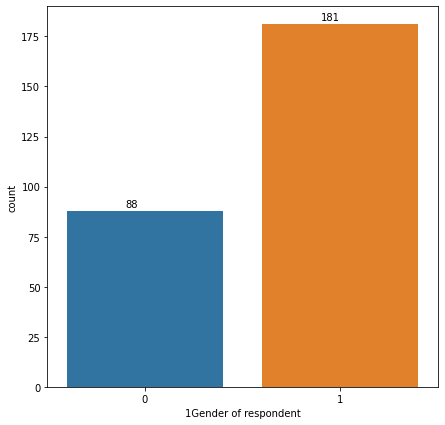

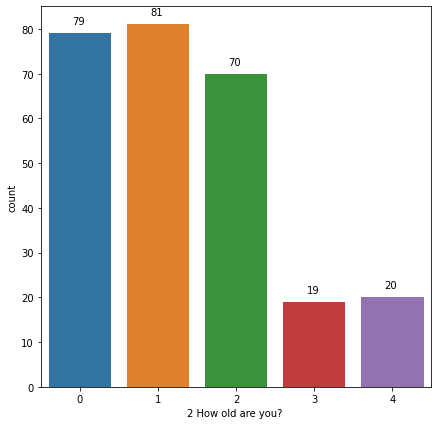

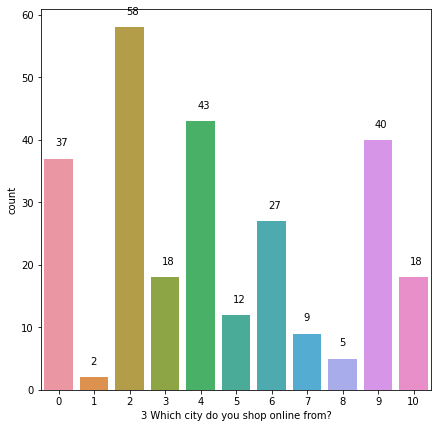

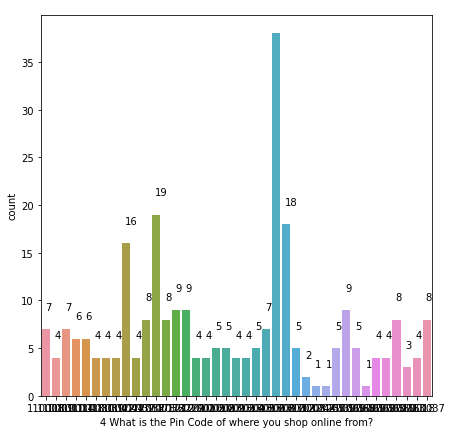

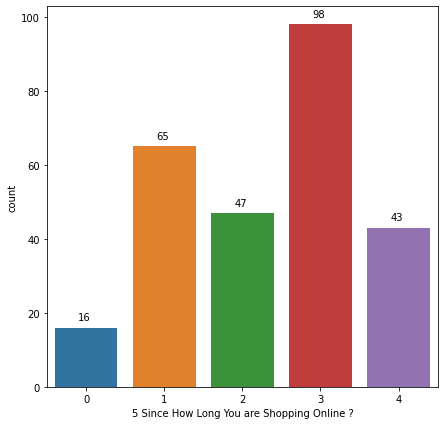

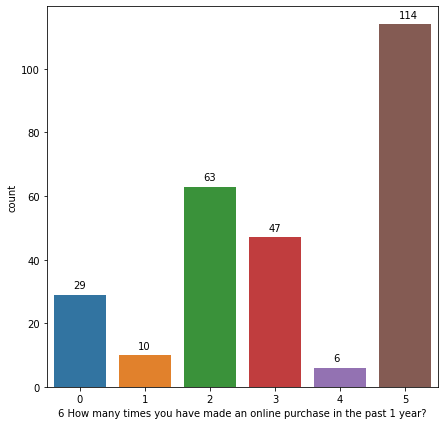

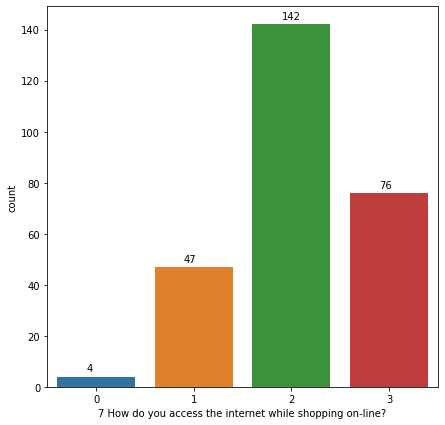

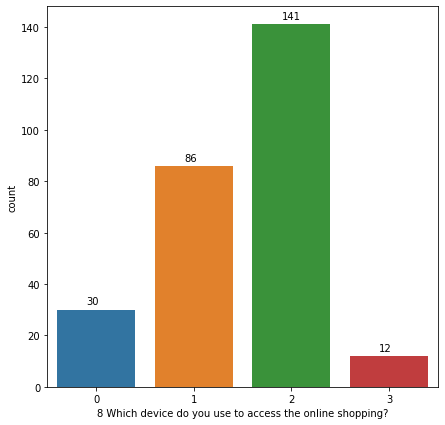

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


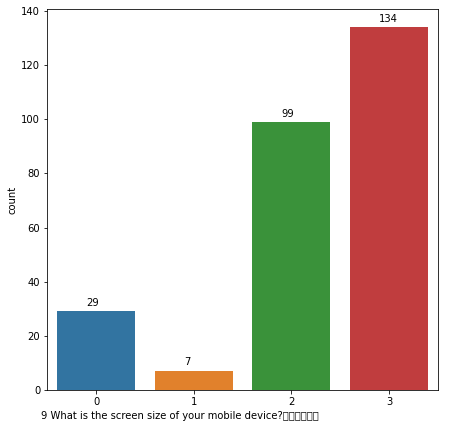

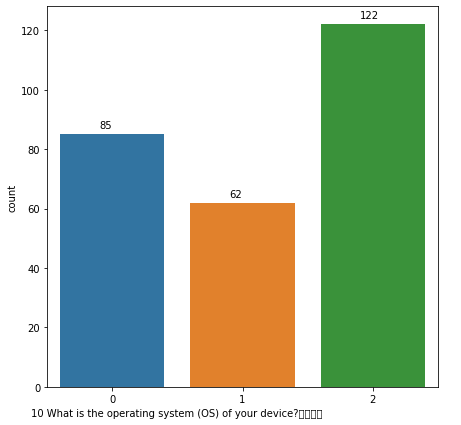

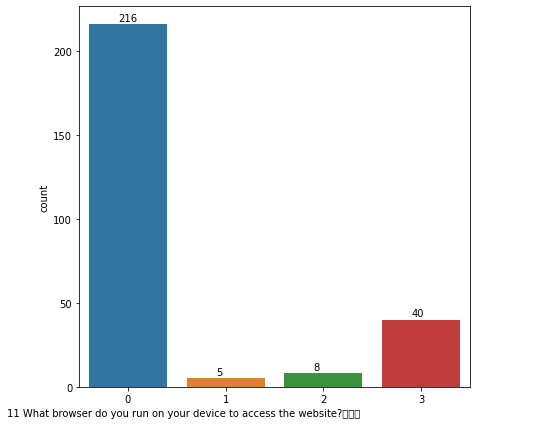

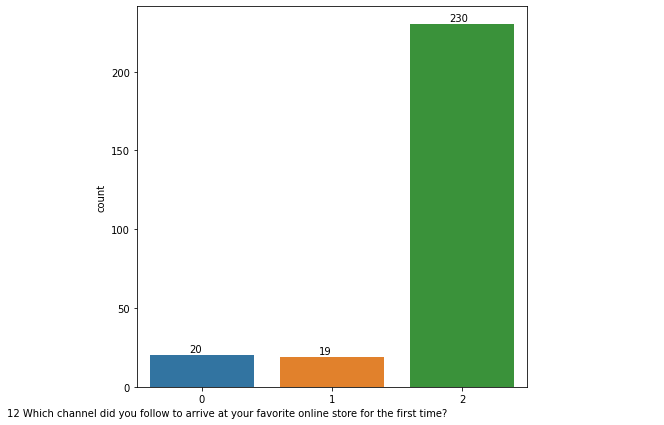

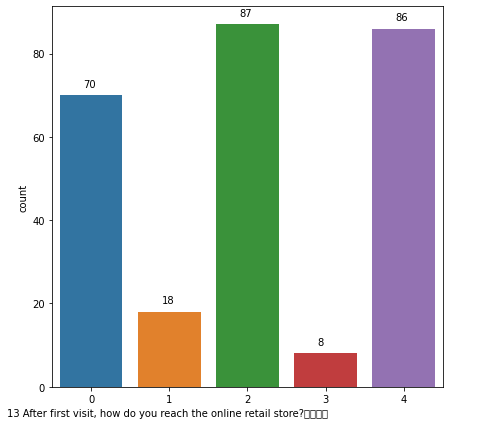

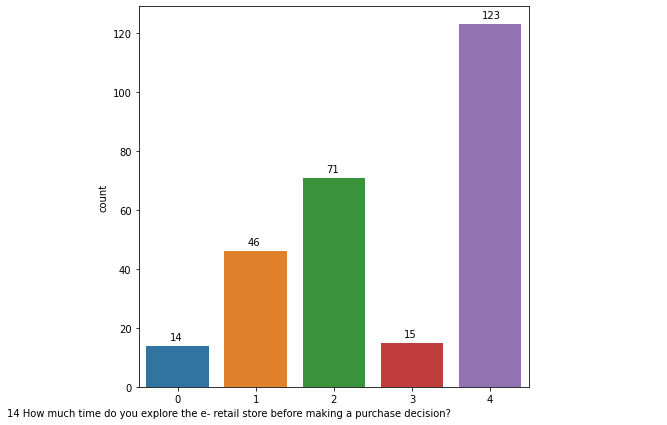

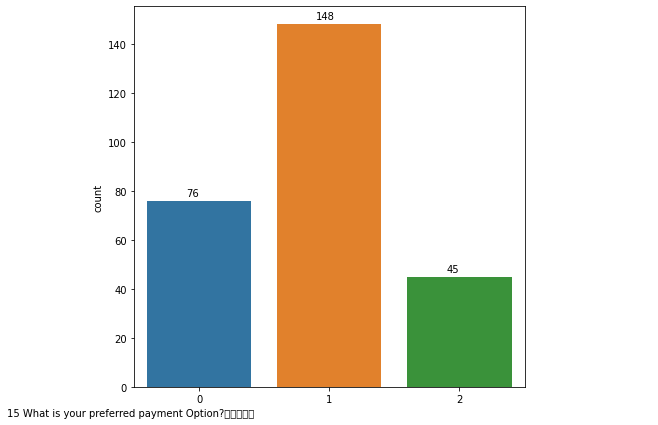

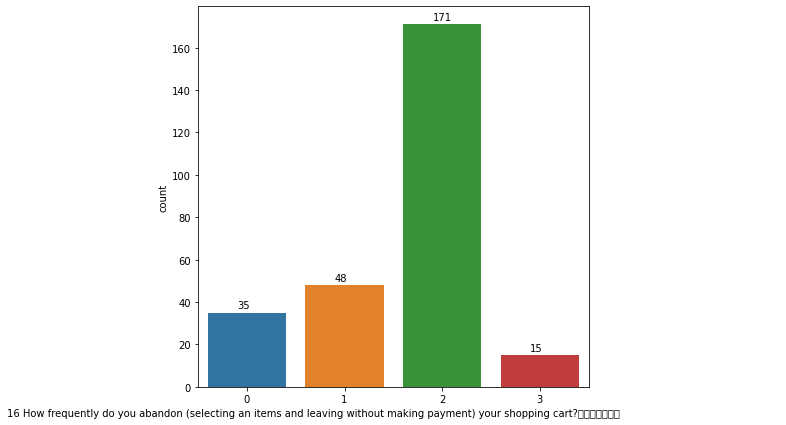

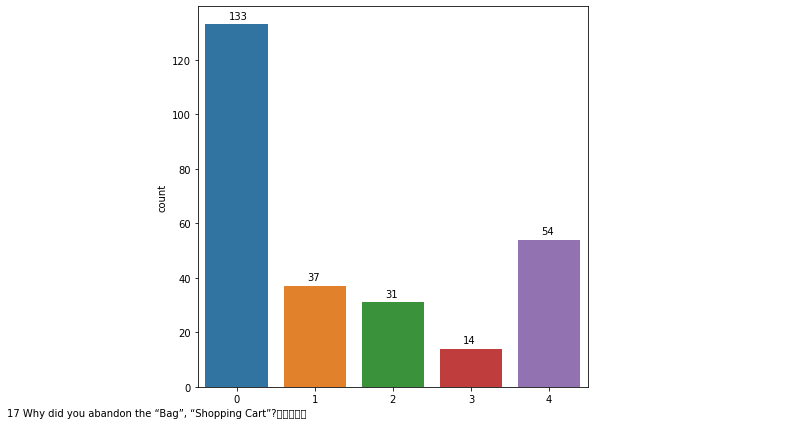

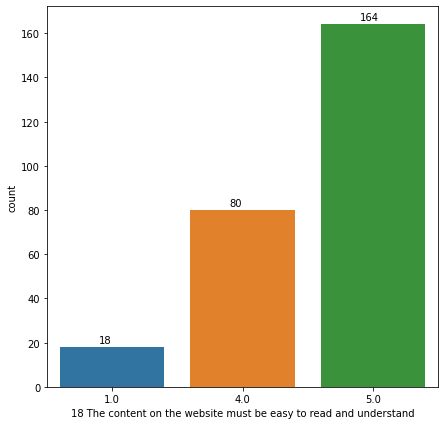

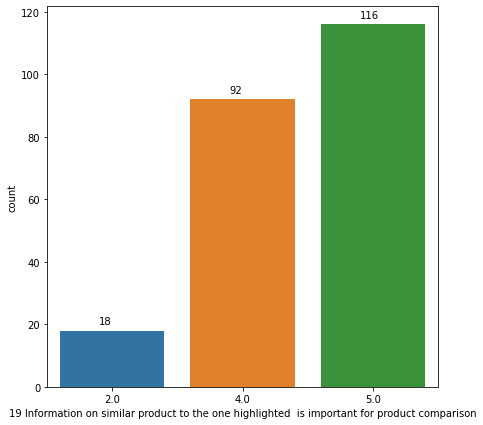

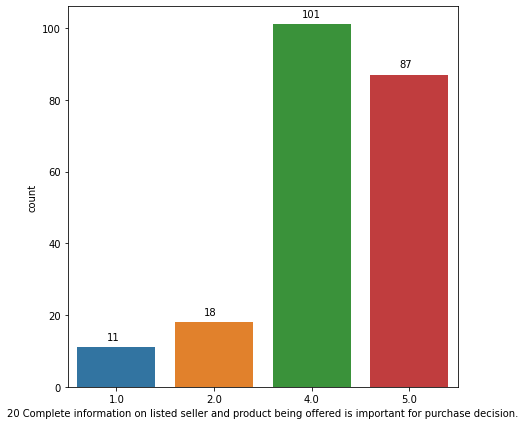

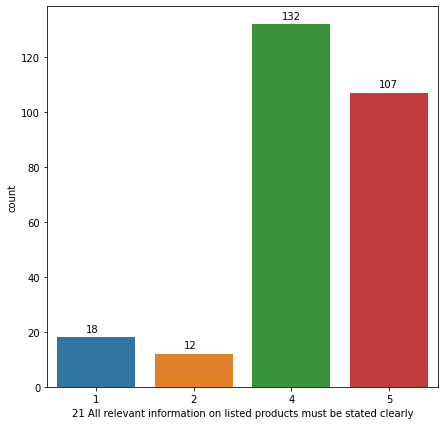

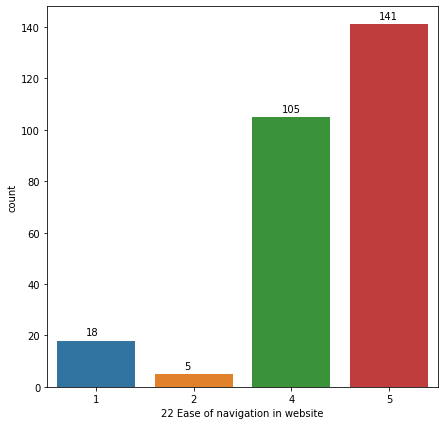

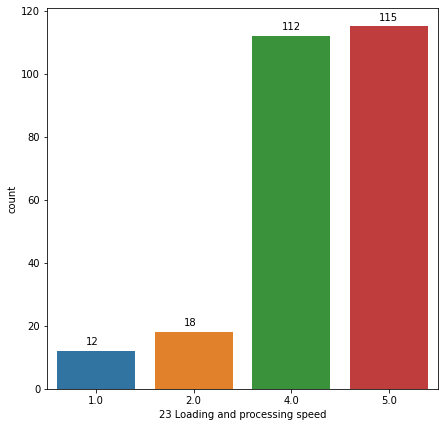

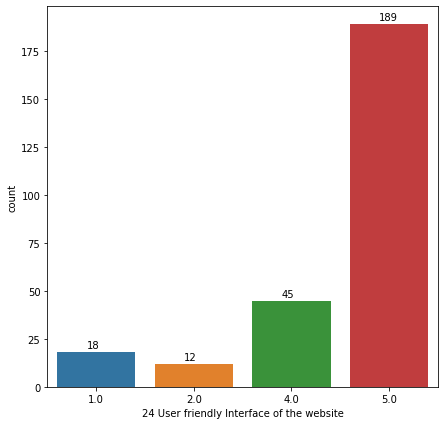

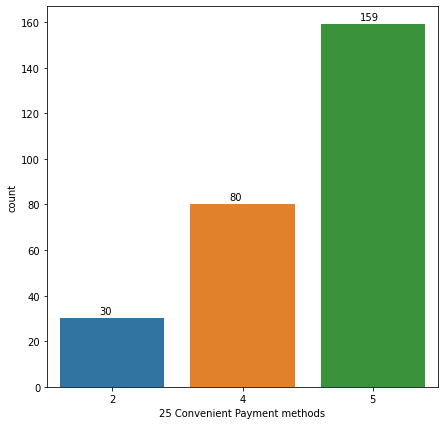

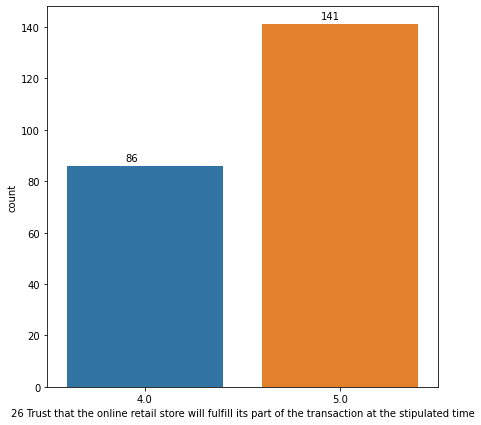

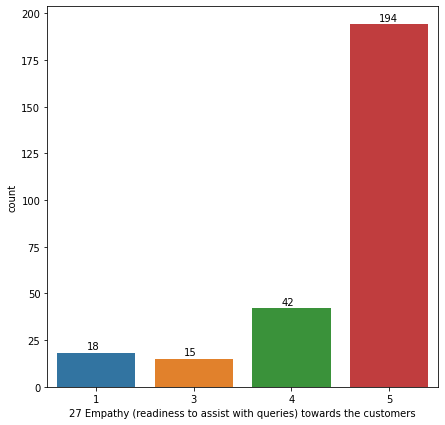

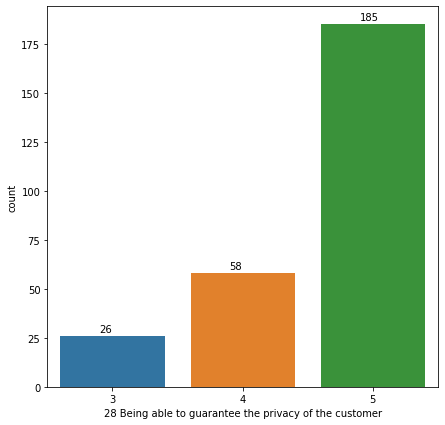

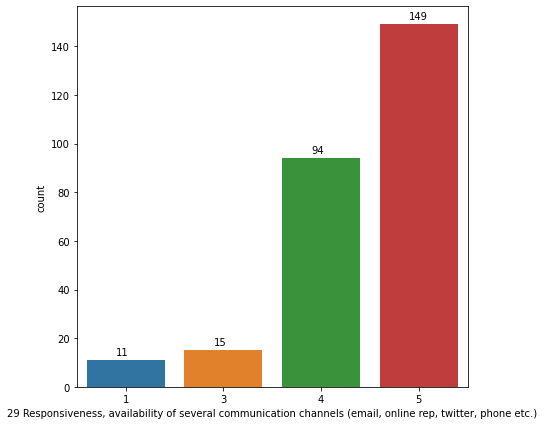

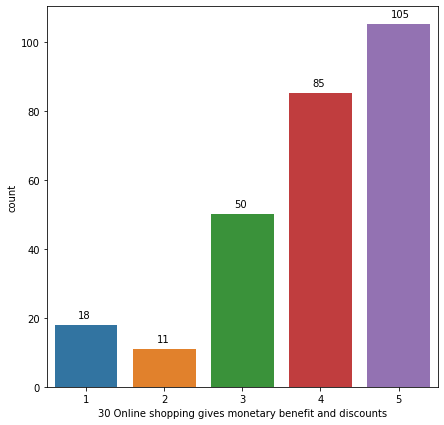

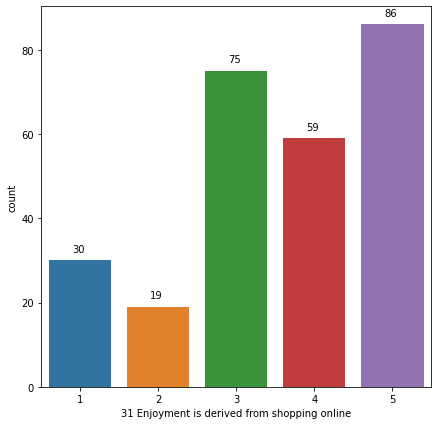

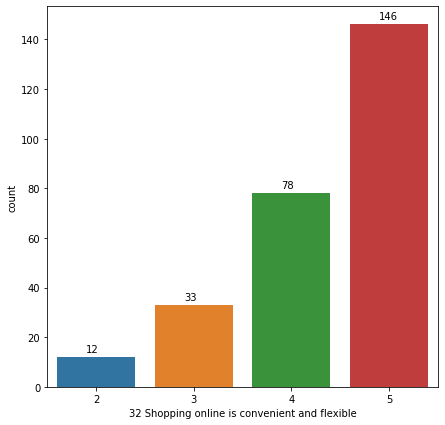

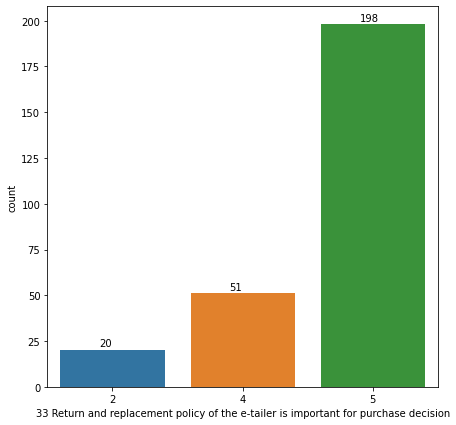

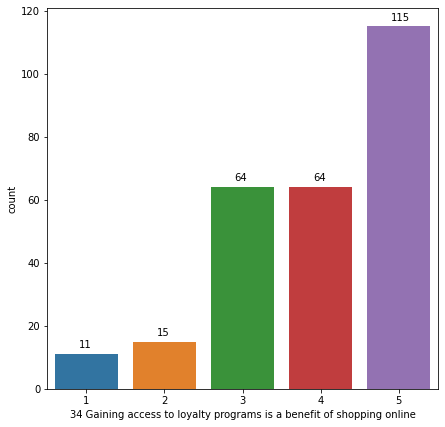

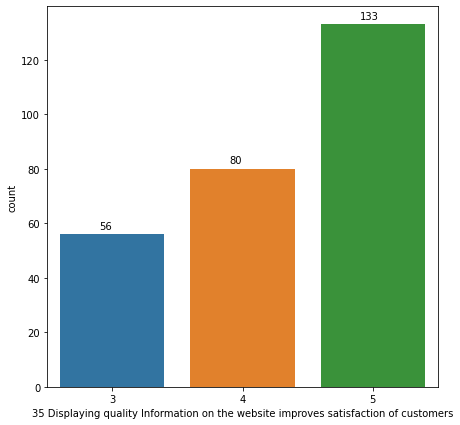

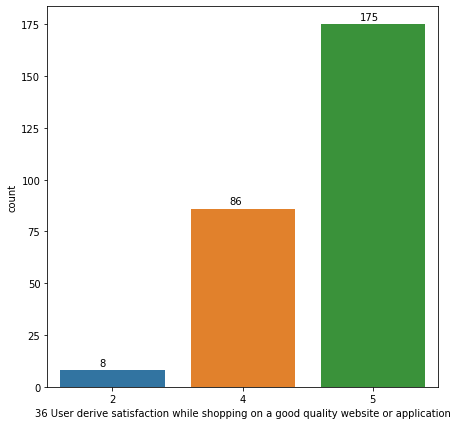

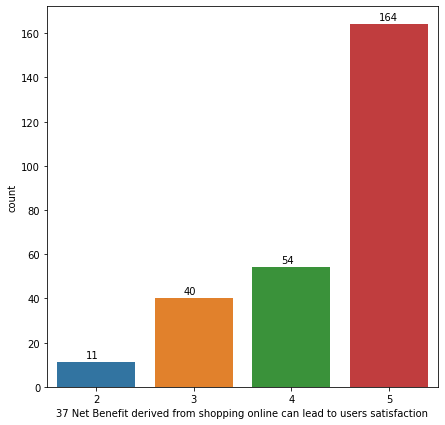

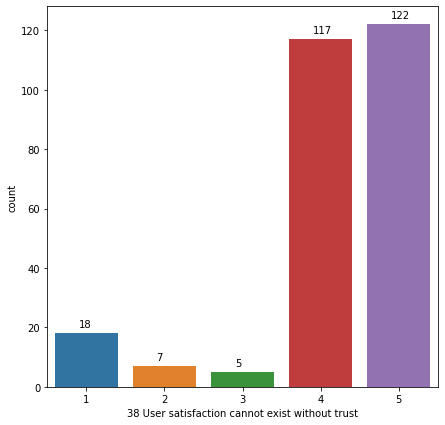

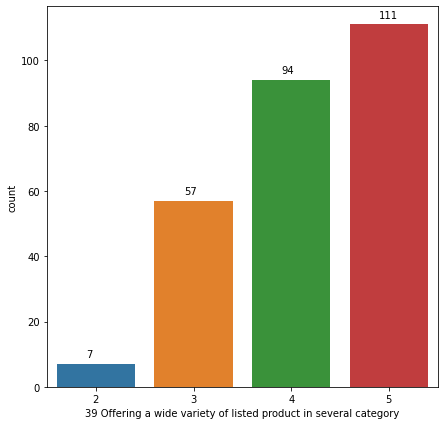

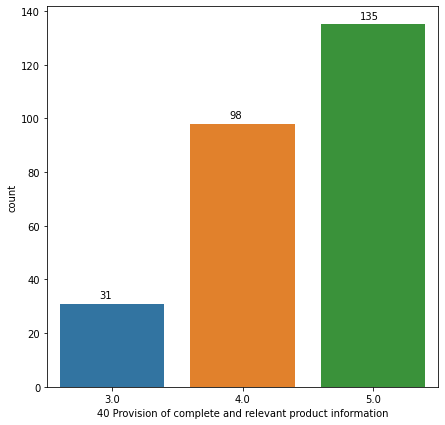

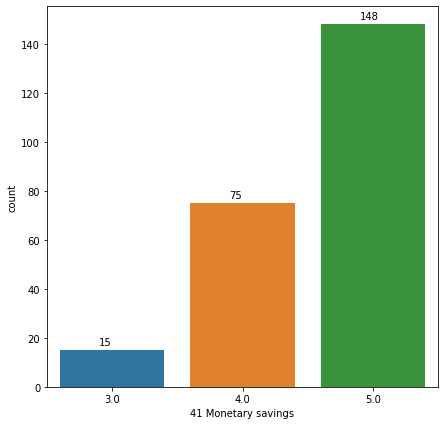

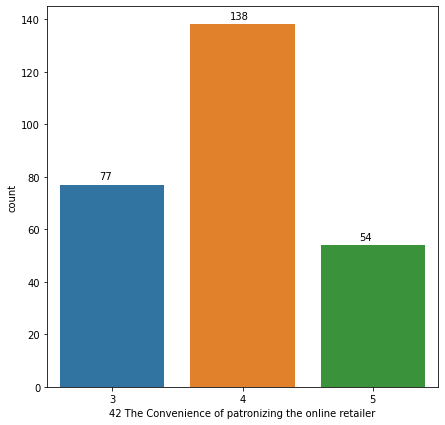

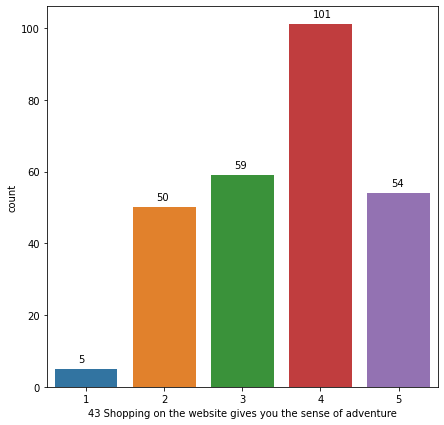

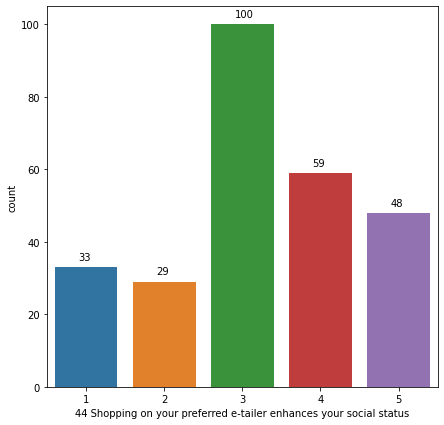

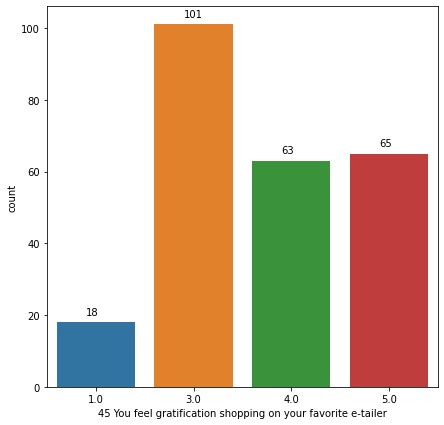

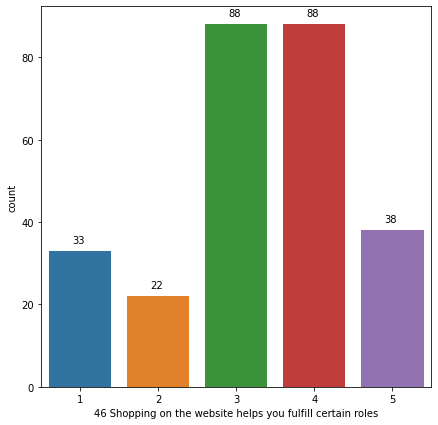

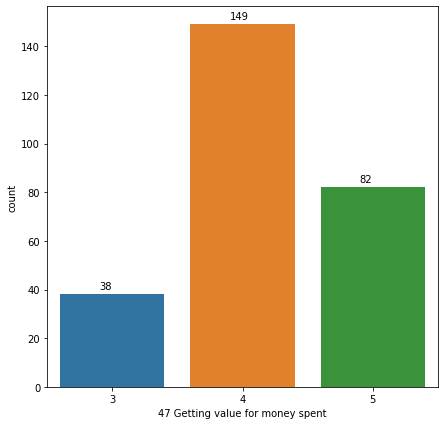

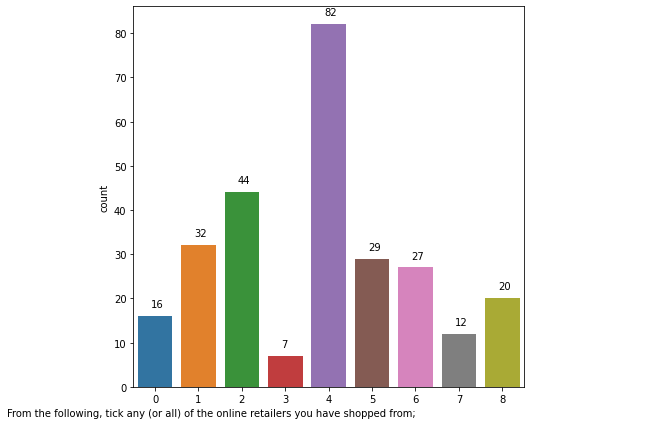

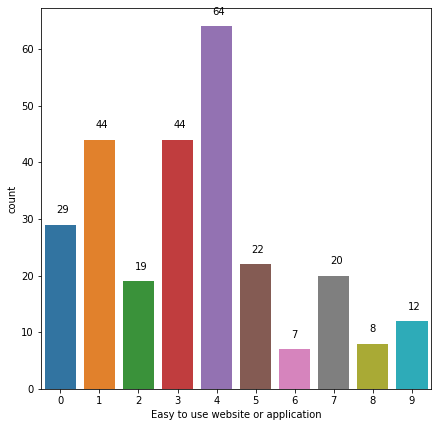

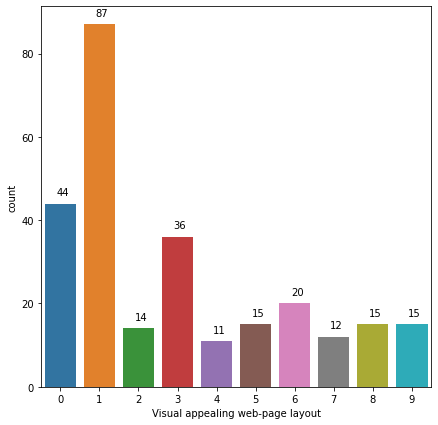

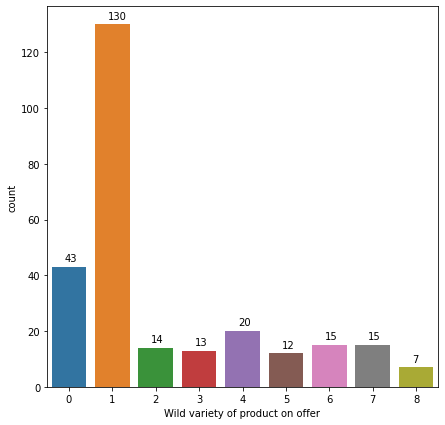

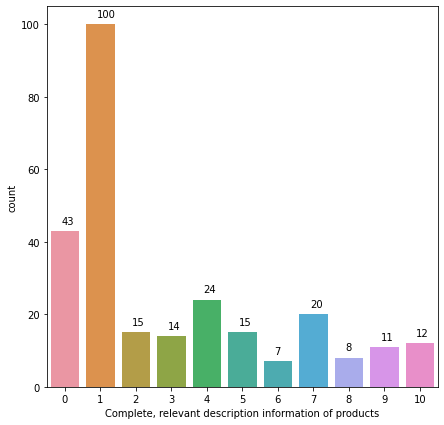

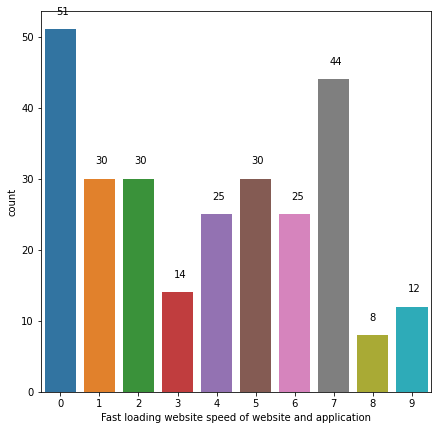

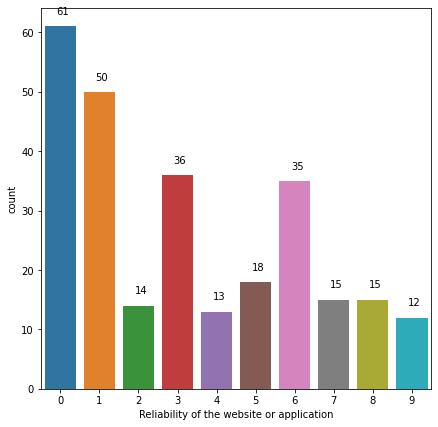

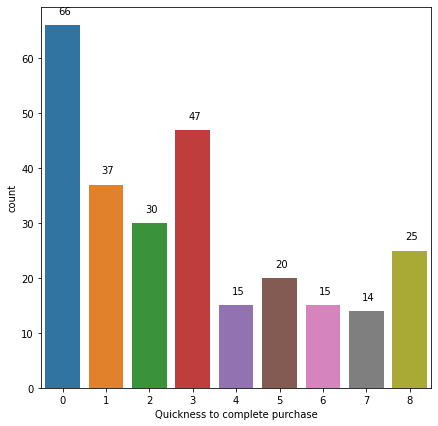

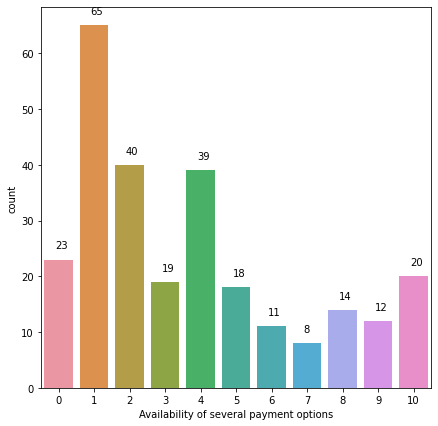

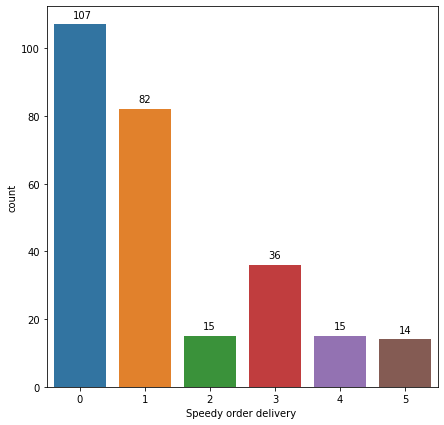

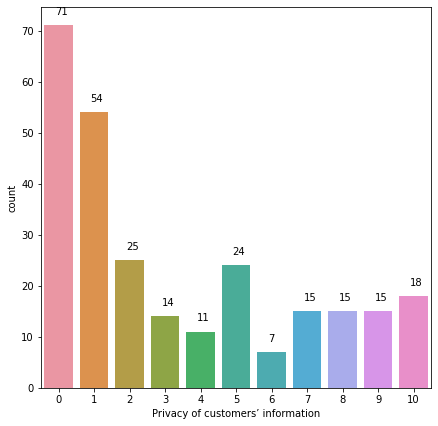

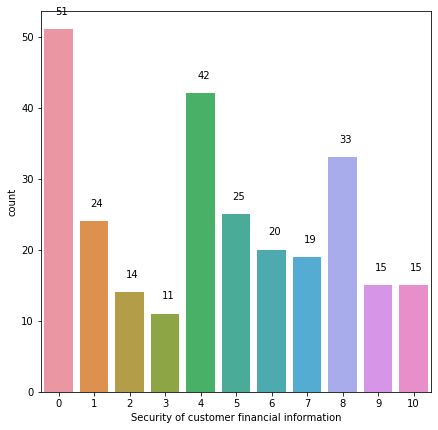

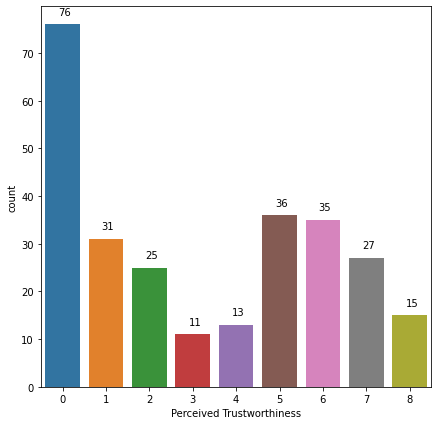

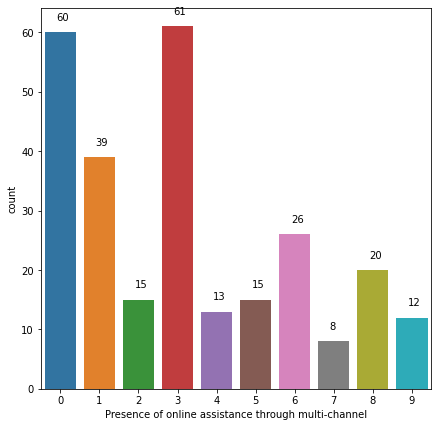

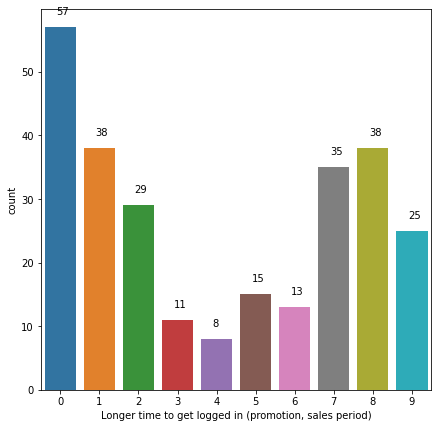

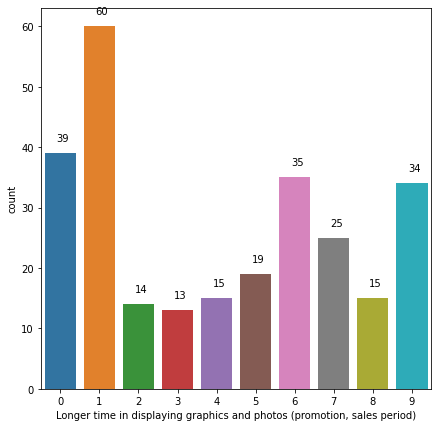

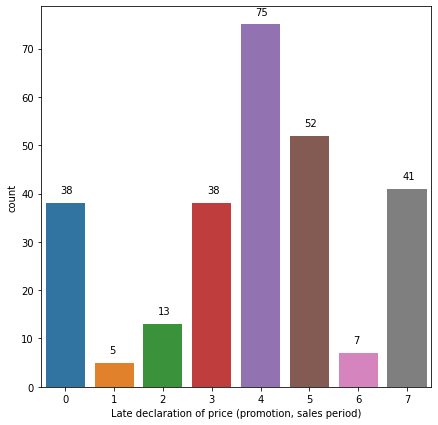

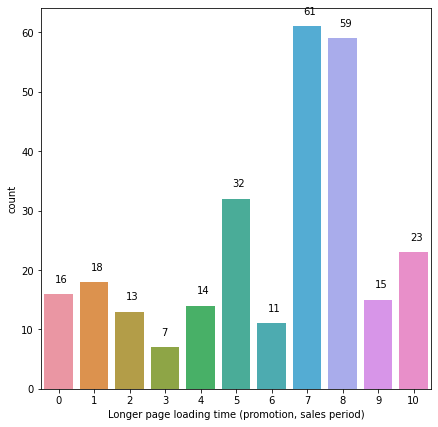

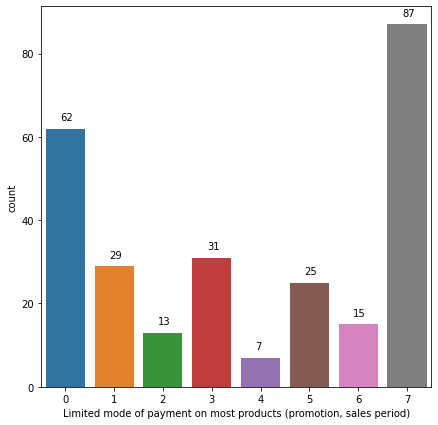

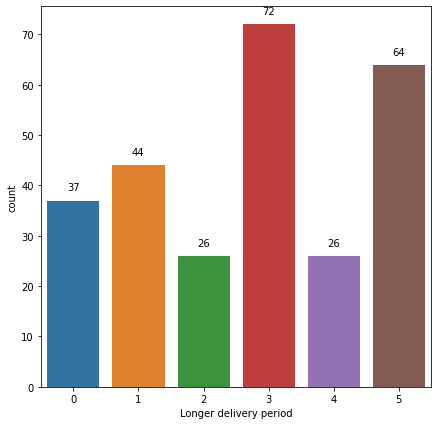

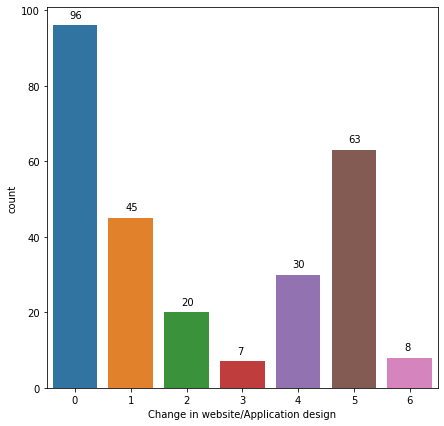

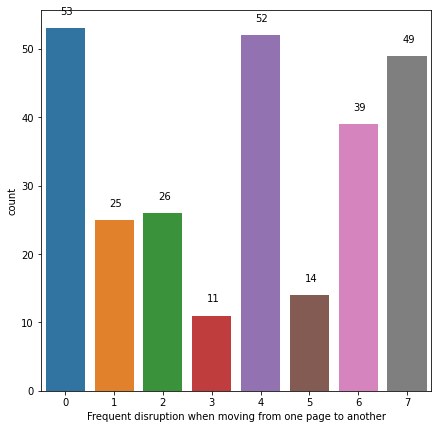

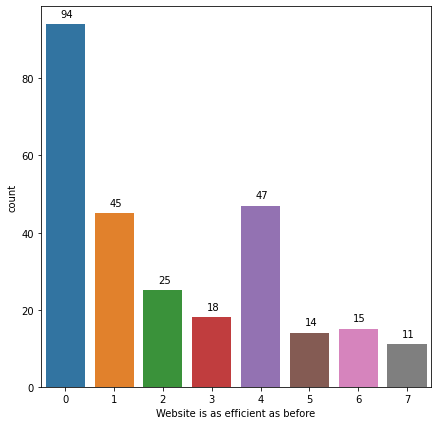

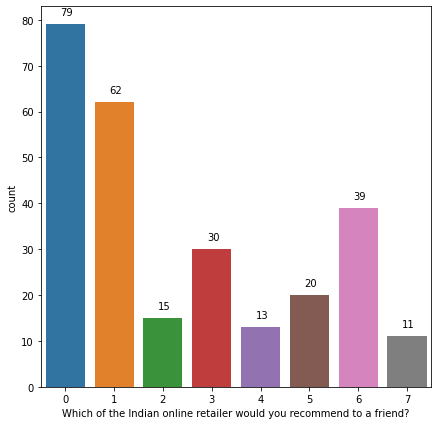

In [22]:
for each in data.columns:
    plt.figure(figsize=(7,7))
    ax=sns.countplot(x=each, data=data)
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+.3, p.get_height()+2))
    plt.show()

<font color=purple> Corelation Matrix </font>

In [89]:
corrmat=data.corr()

In [ ]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)
plt.title("Correlation_matrix")
plt.savefig("correlation.png")
plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


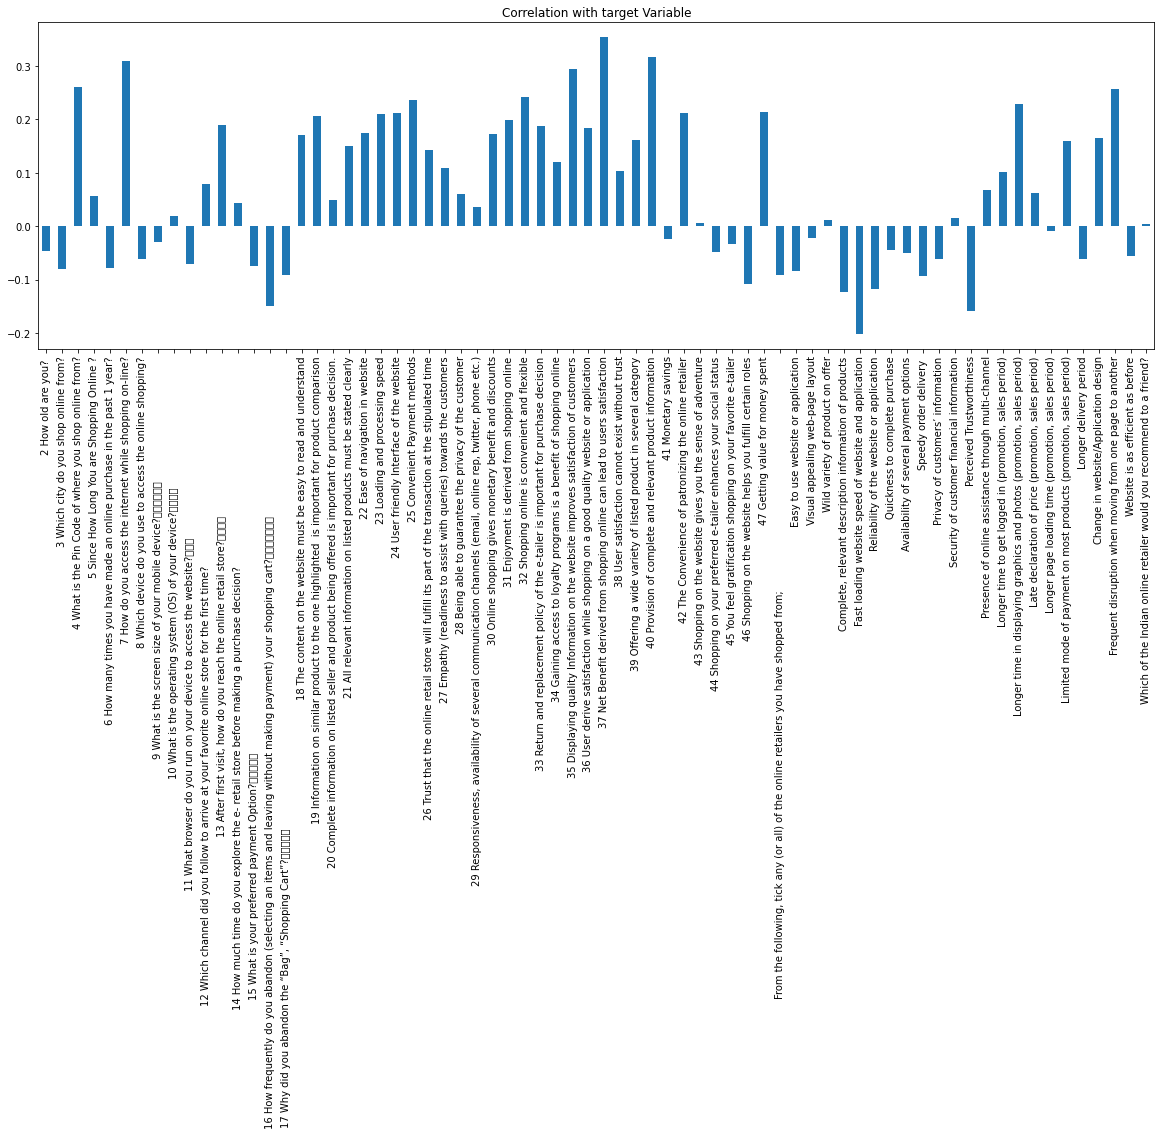

In [24]:
plt.figure(figsize=(20,6))
data.drop("1Gender of respondent", axis=1).corrwith(data["1Gender of respondent"]).plot(kind="bar")
plt.title("Correlation with target Variable")
plt.savefig("correlation_with_target.png")
plt.show()

<font color=purple> Feature Selection </font>

In [23]:
selected_categories=[]
def func_chisq(df,target, categoricals):
    from scipy.stats import chi2_contingency
    
    
    for each in categoricals:
        crosstab=pd.crosstab(index=df[target], columns=df[each])
        chi_result=chi2_contingency (crosstab)
        if chi_result[1]<.05:
            print(each, "is related to ", target,"& p-value:", chi_result[1], "SELECTED")
            selected_categories.append(each)
        else:
            print(each," Not related     NOT SELECTED")
        
    return selected_categories       

In [24]:
func_chisq(df=data, target="1Gender of respondent", categoricals=features_mod )

2 How old are you?   Not related     NOT SELECTED
3 Which city do you shop online from? is related to  1Gender of respondent & p-value: 3.912594581460617e-22 SELECTED
5 Since How Long You are Shopping Online ? is related to  1Gender of respondent & p-value: 0.004574197850492678 SELECTED
6 How many times you have made an online purchase in the past 1 year? is related to  1Gender of respondent & p-value: 2.1020971173823136e-05 SELECTED
7 How do you access the internet while shopping on-line? is related to  1Gender of respondent & p-value: 3.3390550289602543e-07 SELECTED
8 Which device do you use to access the online shopping? is related to  1Gender of respondent & p-value: 1.066516240928891e-06 SELECTED
9 What is the screen size of your mobile device?						                                         is related to  1Gender of respondent & p-value: 0.014181979620565539 SELECTED
10 What is the operating system (OS) of your device?				                                            Not related     

['3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
 '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
 '16 How frequently do you ab

In [25]:
func_chisq(df=data, target="1Gender of respondent", categoricals=features2 )

18 The content on the website must be easy to read and understand is related to  1Gender of respondent & p-value: 2.113860641596195e-06 SELECTED
19 Information on similar product to the one highlighted  is important for product comparison is related to  1Gender of respondent & p-value: 0.00022721111777331088 SELECTED
20 Complete information on listed seller and product being offered is important for purchase decision. is related to  1Gender of respondent & p-value: 0.007569562015536389 SELECTED
21 All relevant information on listed products must be stated clearly is related to  1Gender of respondent & p-value: 0.014491776491489326 SELECTED
22 Ease of navigation in website is related to  1Gender of respondent & p-value: 0.00022756787257494524 SELECTED
23 Loading and processing speed is related to  1Gender of respondent & p-value: 0.0038421649491605075 SELECTED
24 User friendly Interface of the website is related to  1Gender of respondent & p-value: 1.9333936225333232e-06 SELECTED
25 Con

['3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
 '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
 '16 How frequently do you ab

In [26]:
func_chisq(df=data, target="1Gender of respondent", categoricals=features3 )

From the following, tick any (or all) of the online retailers you have shopped from;                                                                            is related to  1Gender of respondent & p-value: 0.00014489176641980768 SELECTED
Easy to use website or application is related to  1Gender of respondent & p-value: 6.98489347793469e-08 SELECTED
Visual appealing web-page layout is related to  1Gender of respondent & p-value: 8.160396310800043e-10 SELECTED
Wild variety of product on offer is related to  1Gender of respondent & p-value: 0.036315703383965205 SELECTED
Complete, relevant description information of products is related to  1Gender of respondent & p-value: 1.958866577714588e-06 SELECTED
Fast loading website speed of website and application is related to  1Gender of respondent & p-value: 0.0007553116660477705 SELECTED
Reliability of the website or application is related to  1Gender of respondent & p-value: 1.0864679832796535e-06 SELECTED
Quickness to complete purchase is r

['3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
 '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
 '16 How frequently do you ab

In [27]:
new_data=data[selected_categories]
new_data["Target"]=data["1Gender of respondent"]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
new_data.dropna(inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
new_data.Target.value_counts()

1    119
0     39
Name: Target, dtype: int64

<font color=purple> Handling Outliers</font>

In [31]:
from scipy.stats import zscore
z=abs(zscore(new_data))
data_mod=new_data[(z<3).all(axis=1)]

<font color=purple> Splitting the data into X and y</font>

In [32]:
X=new_data.drop(columns=["Target"])
y=new_data["Target"]

In [33]:
X.shape, y.shape

((158, 62), (158,))

<font color=purple> Handle the skewness<font> 

In [34]:
X.head()

3 Which city do you shop online from?  \
1                                      2   
2                                      4   
5                                      9   
6                                      2   
8                                     10   

   5 Since How Long You are Shopping Online ?  \
1                                           3   
2                                           2   
5                                           3   
6                                           3   
8                                           1   

   6 How many times you have made an online purchase in the past 1 year?  \
1                                                  3                       
2                                                  3                       
5                                                  3                       
6                                                  2                       
8                                                  5                       

   7 How do you access the internet while shopping on-line?  \
1                                                  3          
2                                                  1          
5                                                  3          
6                                                  3          
8                                                  3          

   8 Which device do you use to access the online shopping?  \
1                                                  2          
2                                                  2          
5                                                  2          
6                                                  3          
8                                                  2          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
1                                                  0                                                      
2                                                  2                                                      
5                                                  2                                                      
6                                                  3                                                      
8                                                  2                                                      

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
1                                                  0                                                                                  
2                                                  0                                                                                  
5                                                  0                                                                                  
6                                                  0                                                                                  
8                                                  0                                                                                  

   12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
1                                                  2                                                                                                                
2                                                  2                                                                                                                
5                                                  2                                                                                                                
6                                                  1                                                              

<font color=purple> performing standard scaler </font>

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=10)

In [37]:
X_pca=pca.fit_transform(X)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X=pd.DataFrame(X_, columns=X.columns)

In [39]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3) ]
for m in model:
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Classification Repport:", classification_report(y_test,y_pred))
    print("*********************************************")
    print()
    print() 

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.75
mse: 0.25
rmse: 0.5
Classification Repport:               precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.79      0.92      0.85        25

    accuracy                           0.75        32
   macro avg       0.56      0.53      0.53        32
weighted avg       0.69      0.75      0.71        32

*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.75
mse: 0.25
rmse: 0.5
Classification Repport:               precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
   

<font color=purple>Ensemble techniques</font>

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=500, random_state=123)
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500, random_state=123)
en=[rf, gdb,adb]
for i in en:
    i.fit(X_train, y_train)
    i.score(X_train, y_train)
    y_pred=i.predict(X_test)
    print("for Ensemble Tech", i, "Accuracy Score:", accuracy_score(y_test,y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()
    print()

for Ensemble Tech RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False) Accuracy Score: 0.90625
mse: 0.09375
rmse: 0.30618621784789724


for Ensemble Tech GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_s

<font color=purple> Hyper Parameter Tuning </font>

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid={"criterion": ['gini', 'entropy'],
            "max_features":['auto', 'sqrt', 'log2'],
           "random_state": range(42,200)}
clf=GridSearchCV(RandomForestClassifier(), param_grid)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'random_state': 42}

In [44]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X,y, random_state=42, test_size=.2)
final_model=RandomForestClassifier(criterion= 'gini', random_state=42, max_features='auto')
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", accuracy_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for Model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) Accuracy Score: 0.90625
mse: 0.09375
rmse: 0.30618621784789724


In [49]:
from sklearn.model_selection import cross_val_score
model_scores=cross_val_score(final_model,X,y,cv=10,scoring='accuracy')

In [50]:
print(model_scores.mean())
print(model_scores.std())

0.93125
0.11336473217010659


In [51]:
from sklearn.externals import joblib
joblib.dump(final_model, "Customer_retention.obj")

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Customer_retention.obj']